In [7]:
pip install statannot 

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [9]:
url = 'https://drive.google.com/uc?export=download&id=1tjEQ9k3EHM0kbuZXMmcgyCslss3LtVR6'
data = pd.read_table(url, sep='\t', decimal=',')

# Исходные данные

In [10]:
data = data.sort_values('Age', ignore_index=True)
data

,ID,Age,Sex,Cohort,A2M,ABL1,ABL2,ACAN,ACE2,ACP1,...,XPNPEP1,XRCC6,YES1,YWHAB,YWHAB.YWHAE.YWHAG.YWHAH.YWHAQ.YWHAZ.SFN,YWHAE,YWHAQ,YWHAZ,ZAP70,ZNRF3
0,41,21,Female,Seattle,4.298,2.497,2.902,2.793,2.463,3.095,...,3.610,2.143,2.510,3.812,2.944,3.181,3.072,4.667,3.682,3.551
1,26,22,Female,Seattle,4.338,2.185,3.078,2.965,2.445,3.704,...,4.091,2.353,2.658,4.128,3.218,3.312,2.847,5.020,3.720,2.408
2,42,22,Female,Seattle,4.341,2.952,2.897,2.697,2.352,3.222,...,3.576,2.270,2.534,3.841,2.979,3.232,2.875,4.702,3.761,2.372
3,7,22,Male,Seattle,4.155,2.281,3.062,2.743,2.459,3.112,...,4.213,2.159,2.738,4.382,3.446,3.167,2.958,5.189,3.655,2.466
4,15,23,Male,Seattle,4.161,2.576,3.019,2.694,2.470,3.129,...,4.113,2.181,2.740,4.384,3.475,3.142,2.940,5.222,3.680,2.620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,11030,105,Male,PRIN09,3.957,2.250,3.036,2.708,2.469,3.697,...,4.086,2.344,2.924,4.416,3.636,3.146,3.023,5.150,3.680,2.485
167,11300,106,Female,PRIN09,4.142,2.278,3.037,2.770,2.414,3.600,...,3.455,2.264,2.717,3.866,2.942,3.162,2.871,4.504,3.787,2.471
168,11140,106,Male,PRIN09,4.066,2.262,3.131,2.704,3.019,3.517,...,3.600,2.258,2.692,4.084,3.097,3.133,2.968,4.750,3.747,2.556
169,11130,106,Female,PRIN09,4.149,2.199,3.022,2.598,2.508,3.377,...,4.045,2.172,2.735,4.315,3.389,3.149,3.089,5.133,3.599,2.605


## Определить 5 показателей, которые сильнее всего изменяются в процессе старения

### Для нахождения показателей, сильнее всего изменяющихся в процессе старения:
* Посчитаем коэффициент корреляции между каждым показателем и возрастом*
* Выберем 5 показателей наиболее коррелирующих по модулю с возрастом*

In [11]:
cor_coeffs = pd.DataFrame(columns=data.columns[4:], dtype='float64')

for column in data.iloc[:, 4:]:
    cur_cor_coeff = data['Age'].corr(data[column])
    cor_coeffs.loc['cor_coeff', column] = cur_cor_coeff
    cor_coeffs.loc['abs_cor_coeff', column] = abs(cur_cor_coeff)
cor_coeffs

,A2M,ABL1,ABL2,ACAN,ACE2,ACP1,ACP5,ACVR1B,ACVRL1,ACY1,...,XPNPEP1,XRCC6,YES1,YWHAB,YWHAB.YWHAE.YWHAG.YWHAH.YWHAQ.YWHAZ.SFN,YWHAE,YWHAQ,YWHAZ,ZAP70,ZNRF3
cor_coeff,-0.17511,0.046164,0.25122,-0.025659,0.263289,0.003298,0.164015,0.31798,0.072016,-0.248127,...,-0.193677,0.045753,0.334059,0.06562,0.123818,-0.273916,0.170862,-0.088148,0.047161,0.055326
abs_cor_coeff,0.17511,0.046164,0.25122,0.025659,0.263289,0.003298,0.164015,0.31798,0.072016,0.248127,...,0.193677,0.045753,0.334059,0.06562,0.123818,0.273916,0.170862,0.088148,0.047161,0.055326


## 5 показатей, сильнее всего изменяющихся в процессе старения

In [12]:
num_of_largest = 5

largest_coeffs = pd.Series(cor_coeffs.loc['abs_cor_coeff']).nlargest(n=num_of_largest)
print(*largest_coeffs.index)

GDF15 PTN CCDC80 EFEMP1 MMP12


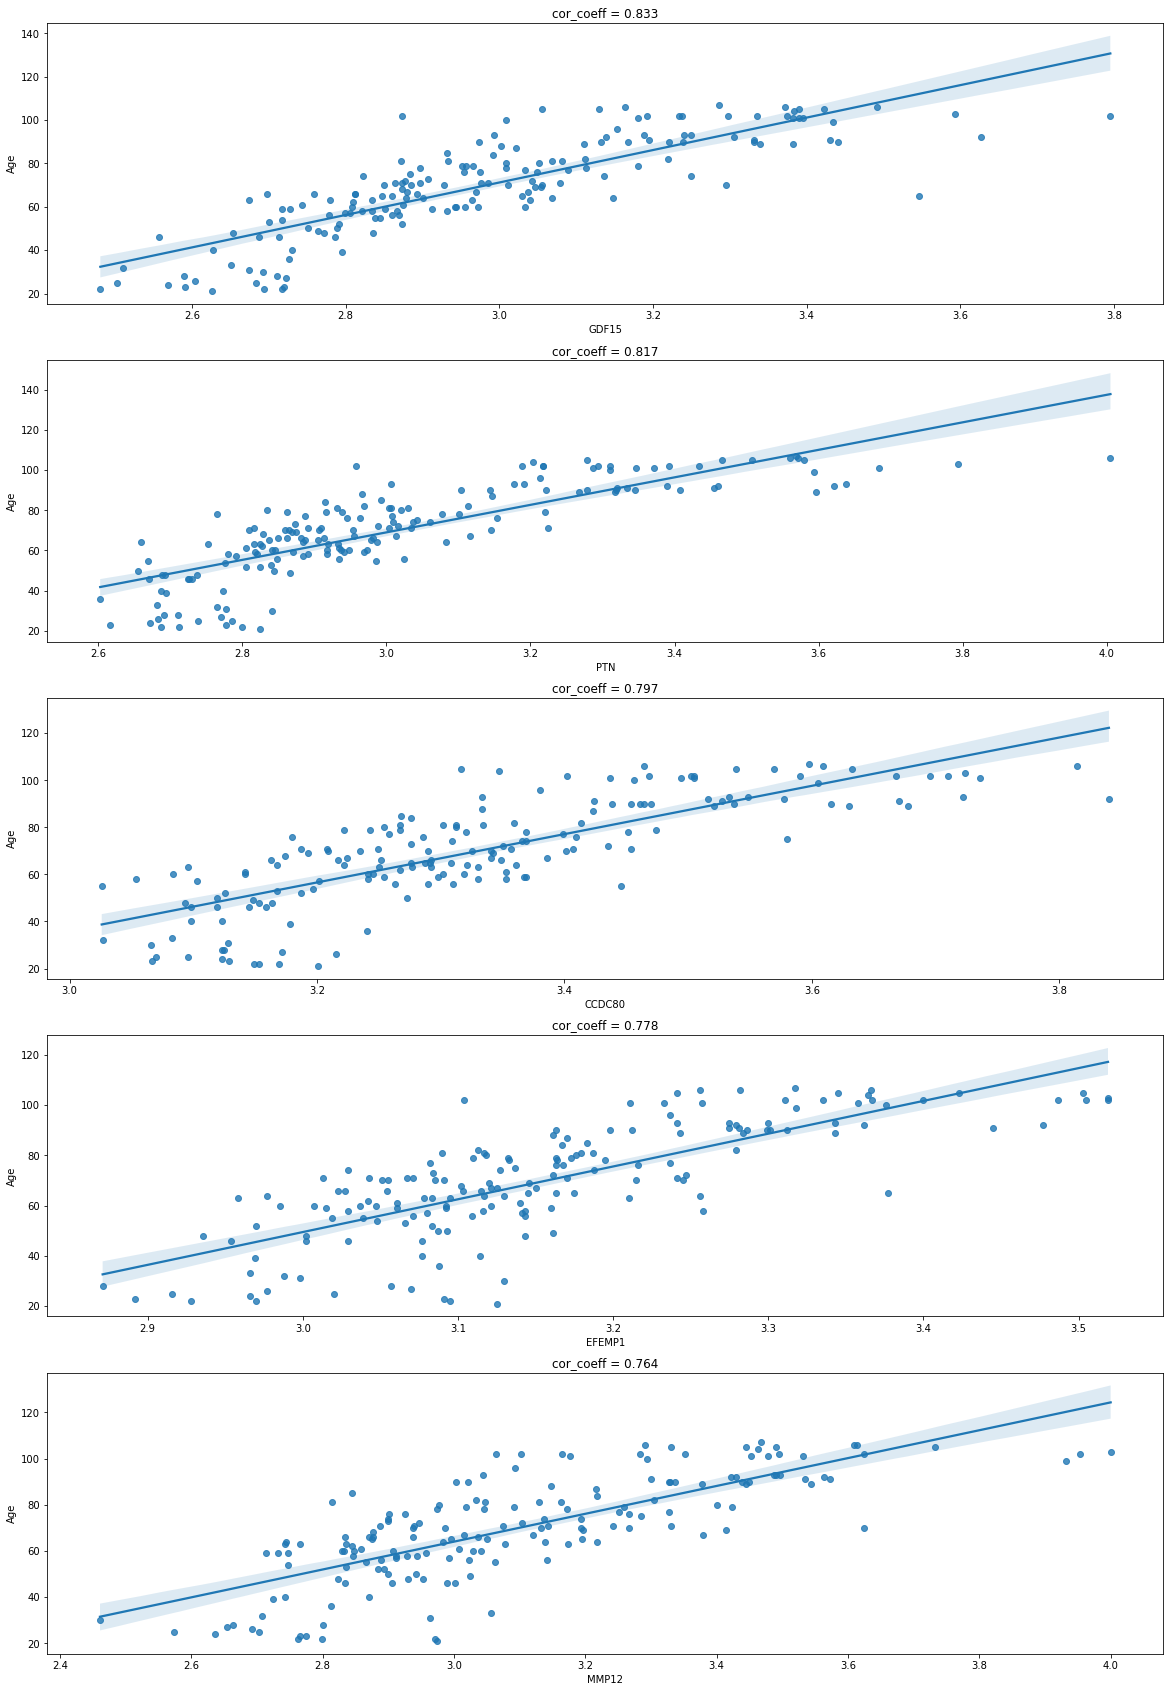

In [13]:
fig, axes = plt.subplots(num_of_largest, figsize=(20, 30))

for i in range(num_of_largest):
    name_of_indicator = largest_coeffs.index[i]
    cor_coeff_value = cor_coeffs.loc['cor_coeff', name_of_indicator].__round__(3)
    
    axes[i].title.set_text("cor_coeff = " + str(cor_coeff_value))
    
    sns.regplot(x=data[name_of_indicator], y=data['Age'], ax=axes[i])

## Разделим выборку на 3 возрастных диапозона по 57 представителей в каждом

In [14]:
sample_1 = data.iloc[0:57, :]
sample_2 = data.iloc[57:114, :]
sample_3 = data.iloc[114:171, :]

def make_range(l_border, r_border):
    return str(l_border) + "-" + str(r_border)

category_1 = make_range(sample_1.iloc[0, 1], sample_1.iloc[-1, 1])
category_2 = make_range(sample_2.iloc[0, 1], sample_2.iloc[-1, 1])
category_3 = make_range(sample_3.iloc[0, 1], sample_3.iloc[-1, 1])

print(category_1, category_2, category_3)

21-61 61-79 80-107


## Выделим из исходной таблицы нужные нам столбцы - 5 показатей, сильнее всего изменяющихся в процессе старения 
### Изменим столбец возраста - поместим в него значения выше найденных возрастных групп

In [15]:
necessary_data = data[largest_coeffs.index].copy()
necessary_data.loc[0:57, 'Age'] = category_1
necessary_data.loc[57:114, 'Age'] = category_2
necessary_data.loc[114:171, 'Age'] = category_3

## Для найденных выше наиболее меняющихся показателей при старении проведем t-test

21-61 v.s. 61-79: Welch's t-test independent samples with Bonferroni correction, P_val=4.742e-12 stat=-7.992e+00
61-79 v.s. 80-107: Welch's t-test independent samples with Bonferroni correction, P_val=1.793e-12 stat=-8.203e+00
21-61 v.s. 80-107: Welch's t-test independent samples with Bonferroni correction, P_val=1.840e-27 stat=-1.557e+01
21-61 v.s. 61-79: Welch's t-test independent samples with Bonferroni correction, P_val=7.956e-10 stat=-6.952e+00
61-79 v.s. 80-107: Welch's t-test independent samples with Bonferroni correction, P_val=2.431e-15 stat=-1.004e+01
21-61 v.s. 80-107: Welch's t-test independent samples with Bonferroni correction, P_val=9.878e-23 stat=-1.431e+01
21-61 v.s. 61-79: Welch's t-test independent samples with Bonferroni correction, P_val=7.133e-09 stat=-6.495e+00
61-79 v.s. 80-107: Welch's t-test independent samples with Bonferroni correction, P_val=1.620e-13 stat=-8.830e+00
21-61 v.s. 80-107: Welch's t-test independent samples with Bonferroni correction, P_val=7.0

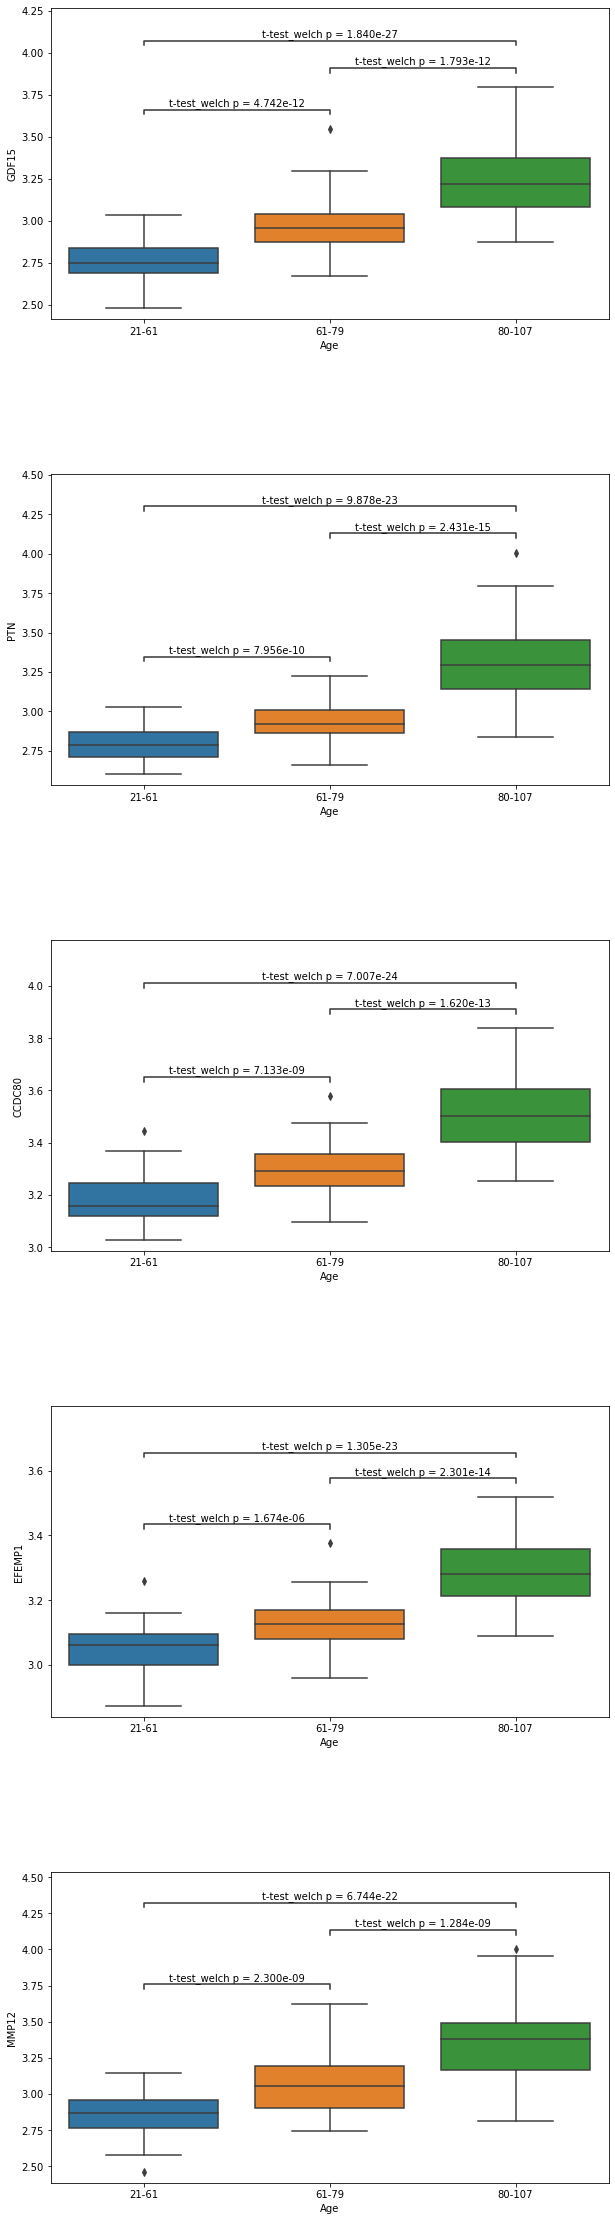

In [16]:
fig, axes = plt.subplots(num_of_largest, figsize=(10, 40))
plt.subplots_adjust(hspace=0.5)

order = [category_1, category_2, category_3]

for i in range(num_of_largest):
    
    age = 'Age'
    name_of_indicator = largest_coeffs.index[i]
    
    sns.boxplot(data=necessary_data, x=age, y=name_of_indicator, order=order, ax=axes[i])
    add_stat_annotation(axes[i], data=necessary_data, x=age, y=name_of_indicator, order=order,
                    box_pairs=[(category_1, category_2), (category_1, category_3), (category_2, category_3)],
                    test='t-test_welch', text_format='full', loc='inside', verbose=2)


## Как видно для рассмотренных возрастных групп и показателей по результатам t-test'a p_value < 0.05. Нулевую гипотезу о равенстве средних значений в рассмотренных возрастных выборках можно опровергнуть